# Anomaly Detection models for financial market data

By Giulia Bergonzoli, Michele Cosi, Carl Jonas Gustafsson, Jon Anders Conrad Jonsson, Martina Del Basso

Our project is divided into three main sections:

1) Data Exploration

2) Anomaly Detection

3) Neural Networks


In [ ]:
# Importing the library that will use to make graphical plot and analysis

# General libraries
import pandas as pd # python's data handling package
import numpy as np # python's scientific computing package
import matplotlib.pyplot as plt # python's plotting package
import warnings
import math
pd.set_option('display.max_columns', None)
np.random.seed(1234)
warnings.filterwarnings("ignore")

# Libraries for visualization
import seaborn as sns
import matplotlib
%config InlineBackend.figure_format = 'png' 
%matplotlib inline

# Scikit-Learn
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit, GridSearchCV, cross_val_score, cross_validate
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.ensemble import IsolationForest

# Evaluation metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import mean_squared_error as mse

# Clustering 
from sklearn.cluster import KMeans

# Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold

# Tensorfolow (neural networks)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.constraints import MaxNorm
from keras.layers import Dense,LSTM,Dropout,Flatten

In [ ]:
# Importing the "FinancialMarketData" file as a Pandas dataframe
dataset = pd.read_excel("FinancialMarketData.xlsx")
dataset.set_index('Data', inplace=True)
dataset.head()

,Y,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,USGG30YR,GT10,USGG2YR,USGG3M,US0001M,GTDEM30Y,GTDEM10Y,GTDEM2Y,EONIA,GTITL30YR,GTITL10YR,GTITL2YR,GTJPY30YR,GTJPY10YR,GTJPY2YR,GTGBP30Y,GTGBP20Y,GTGBP2Y,LUMSTRUU,LMBITR,LUACTRUU,LF98TRUU,LG30TRUU,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
Data,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-11,0,283.25,0.077,1388,157.26,100.56,105.86,1.6460,25.77,22.50,6.671,6.657,6.428,5.426,5.78125,6.121,5.541,4.316,2.89,6.321,5.777,4.495,2.422,1.709,0.346,4.5345,4.7695,6.5238,870.94,474.0453,990.75,546.04,305.0570,116.4635,230.5267,123.7616,1416.12,127.75,990.59,856.76,224.33,217.34,34.30
2000-01-18,0,287.65,0.043,1405,165.01,101.86,105.47,1.6383,28.85,21.50,6.747,6.748,6.465,5.378,5.80250,6.254,5.644,4.321,3.03,6.459,5.889,4.535,2.418,1.765,0.349,4.7456,4.9754,6.6125,869.33,473.2232,990.48,545.68,305.3026,117.2674,231.3770,123.7616,1428.79,129.50,993.98,925.22,234.37,227.08,32.74
2000-01-25,0,287.15,0.135,1368,167.24,102.41,106.04,1.6496,28.28,23.02,6.634,6.692,6.432,5.562,5.81875,6.045,5.515,4.270,3.15,6.281,5.760,4.511,2.259,1.625,0.293,4.6912,4.9003,6.5212,873.50,472.7233,997.68,546.70,306.1812,117.9946,232.3895,123.7616,1385.93,126.48,974.83,886.93,216.82,233.00,32.46
2000-02-01,0,282.75,0.191,1311,166.85,104.92,107.85,1.6106,28.22,23.45,6.423,6.619,6.574,5.708,5.88500,5.944,5.459,4.326,3.30,6.188,5.710,4.540,2.330,1.770,0.364,4.5925,4.7939,6.4670,871.22,473.2549,997.91,547.38,305.9967,120.5100,231.9417,122.3281,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29
2000-02-08,1,298.40,0.312,1277,165.43,104.22,109.30,1.6108,28.02,21.25,6.231,6.613,6.678,5.677,5.89125,5.850,5.482,4.390,3.26,6.118,5.728,4.638,2.481,1.919,0.359,4.5475,4.7678,6.4719,872.39,474.7334,998.77,548.25,309.4761,118.7914,237.8117,122.3281,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32


# Coping with stationarity
Unless we use cointegration modeling, we need stationary data; which means that the joint distribution of the relevant variables must be stable over time. We are trying to use historical data to infer something about the structure of systemic risk; if that structure is not stable over time, historical data may not be an accurate and reliable guide to what the future hold. So we perform some transformations in order to obtain stationarity.

In [ ]:
# Always positive variables => log-differences (log-returns)
Indices = ['XAU BGNL', 'BDIY', 'CRY', 'Cl1', 'DXY', 'EMUSTRUU', 'GBP', 'JPY', 'LF94TRUU', 'LF98TRUU', 'LG30TRUU', 'LMBITR', 'LP01TREU', 'LUACTRUU', 'LUMSTRUU', 'MXBR', 'MXCN', 'MXEU', 'MXIN', 'MXJP', 'MXRU', 'MXUS', 'VIX']

# Possibly negative variables => first differences
InterestRates = ['EONIA', 'GTDEM10Y', 'GTDEM2Y', 'GTDEM30Y', 'GTGBP20Y', 'GTGBP2Y', 'GTGBP30Y', 'GTITL10YR', 'GTITL2YR', 'GTITL30YR', 'GTJPY10YR', 'GTJPY2YR', 'GTJPY30YR', 'US0001M', 'USGG3M', 'USGG2YR', 'GT10', 'USGG30YR']

dataset.loc[1:, Indices] = np.diff(np.log(dataset[Indices]), axis=0)
dataset.loc[1:, InterestRates] = np.diff(dataset[InterestRates], axis=0)

# ESCURPUS is economic suprise index and can (possibly) be treaded as stationary already
# we lose one observation (the first)
Response = dataset['Y'][1:]; # we lose one observation (the first)
dataset.drop(dataset.index[0], axis=0, inplace=True) # we lose one observation (the first)

dataset.head()

,Y,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,USGG30YR,GT10,USGG2YR,USGG3M,US0001M,GTDEM30Y,GTDEM10Y,GTDEM2Y,EONIA,GTITL30YR,GTITL10YR,GTITL2YR,GTJPY30YR,GTJPY10YR,GTJPY2YR,GTGBP30Y,GTGBP20Y,GTGBP2Y,LUMSTRUU,LMBITR,LUACTRUU,LF98TRUU,LG30TRUU,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
Data,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-18,0,0.015415,0.043,0.012173,0.048106,0.012845,-0.003691,-0.004689,0.112899,-0.045462,0.076,0.091,0.037,-0.048,0.02125,0.133,0.103,0.005,0.14,0.138,0.112,0.040,-0.004,0.056,0.003,0.2111,0.2059,0.0887,-0.001850,-0.001736,-0.000273,-0.000660,0.000805,0.006879,0.003682,0.00000,0.008907,0.013606,0.003416,0.076874,0.043783,0.043839,-0.046548
2000-01-25,0,-0.001740,0.135,-0.026687,0.013424,0.005385,0.005390,0.006874,-0.019955,0.068310,-0.113,-0.056,-0.033,0.184,0.01625,-0.209,-0.129,-0.051,0.12,-0.178,-0.129,-0.024,-0.159,-0.140,-0.056,-0.0544,-0.0751,-0.0913,0.004785,-0.001057,0.007243,0.001867,0.002874,0.006182,0.004366,0.00000,-0.030457,-0.023597,-0.019454,-0.042265,-0.077834,0.025736,-0.008589
2000-02-01,0,-0.015442,0.191,-0.042560,-0.002335,0.024214,0.016925,-0.023926,-0.002124,0.018507,-0.211,-0.073,0.142,0.146,0.06625,-0.101,-0.056,0.056,0.15,-0.093,-0.050,0.029,0.071,0.145,0.071,-0.0987,-0.1064,-0.0542,-0.002614,0.001124,0.000231,0.001243,-0.000603,0.021094,-0.001929,-0.01165,-0.000447,0.021200,0.032587,-0.051274,-0.071345,0.019045,-0.036710
2000-02-08,1,0.053872,0.312,-0.026277,-0.008547,-0.006694,0.013355,0.000124,-0.007112,-0.098514,-0.192,-0.006,0.104,-0.031,0.00625,-0.094,0.023,0.064,-0.04,-0.070,0.018,0.098,0.151,0.149,-0.005,-0.0450,-0.0261,0.0049,0.001342,0.003119,0.000861,0.001588,0.011307,-0.014364,0.024993,0.00000,0.019048,0.041543,0.026901,0.114851,0.076772,0.082954,0.000958
2000-02-15,1,0.018264,0.391,0.086946,0.024777,0.004500,-0.005229,-0.008855,0.070277,0.075653,0.015,-0.061,-0.050,0.063,-0.01125,0.050,0.080,0.029,-0.01,0.053,0.086,0.013,-0.172,-0.118,-0.026,0.0997,0.1032,-0.0961,0.001100,0.000965,-0.001052,-0.000146,0.003551,-0.001548,0.009644,0.00000,-0.030548,-0.030688,-0.026166,-0.065123,-0.063487,0.113320,-0.124270


## Correlation


(43.5, -0.5)

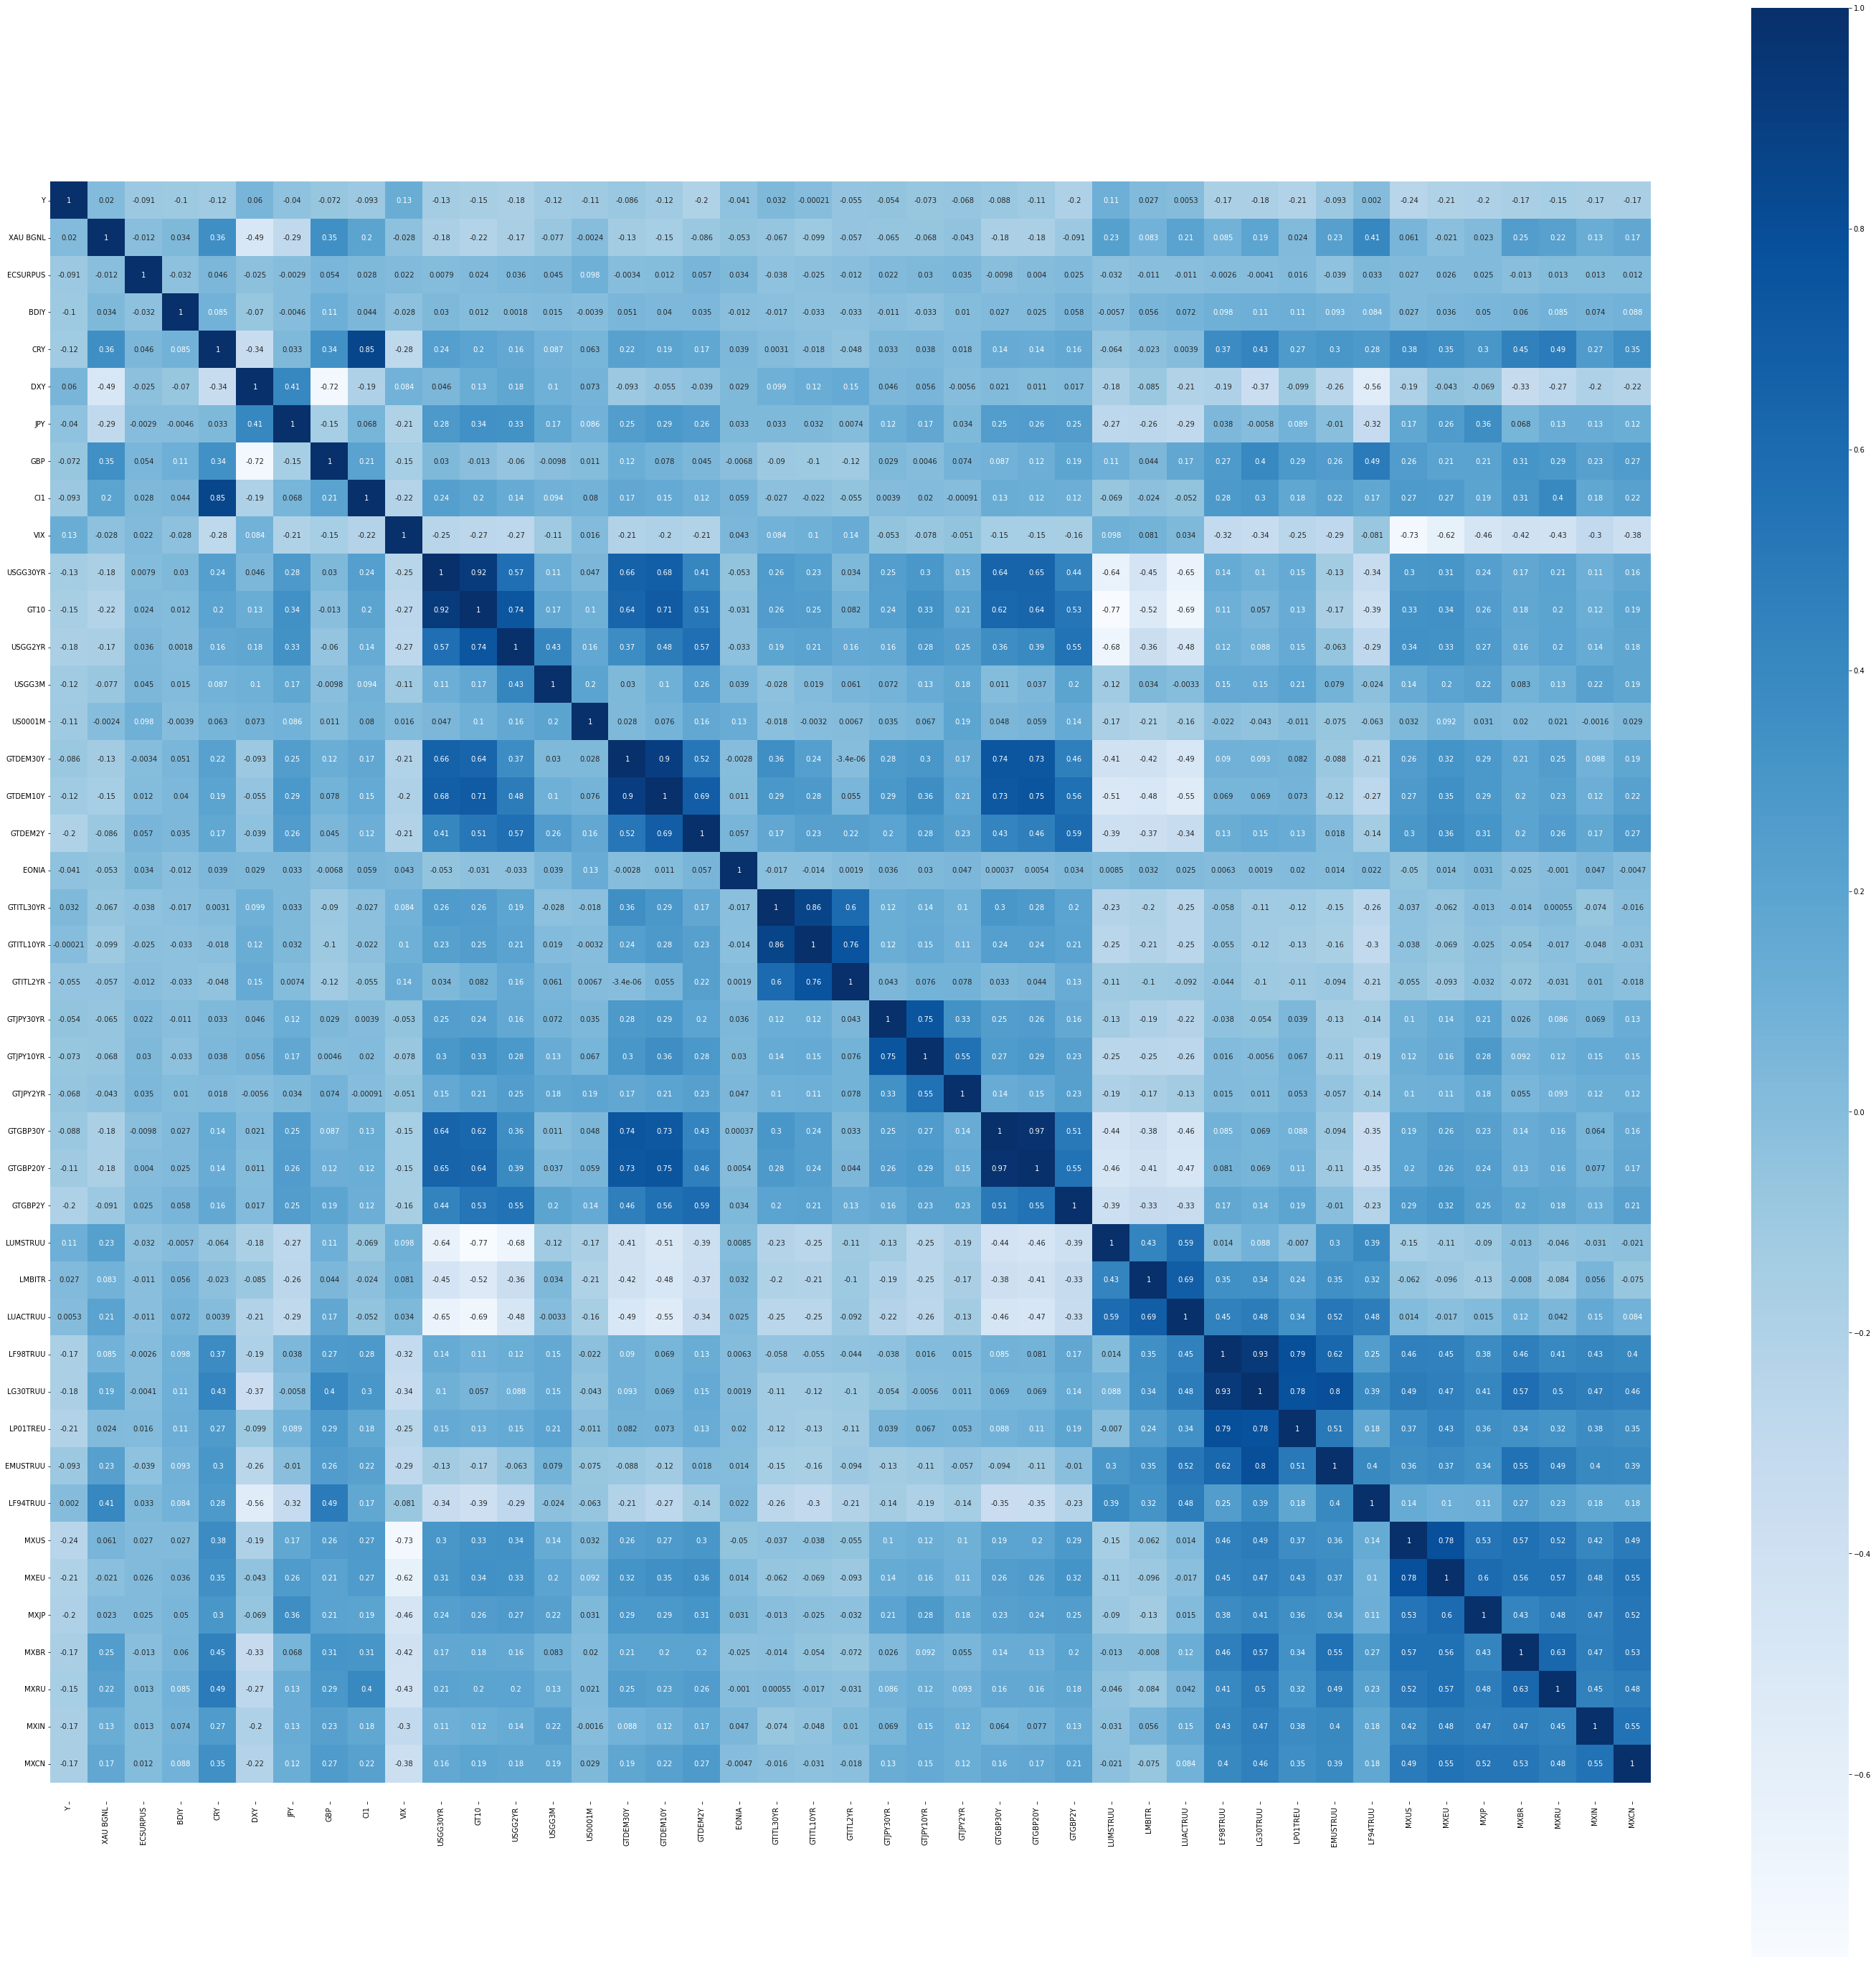

In [ ]:
# Computing the correlation matrix of the  new dataset
corrmat = dataset.corr()

# Visualizing it
plt.figure(figsize=(50, 50))
sns.heatmap(corrmat, square=True, cmap="Blues", annot=True);

# These lines are here only to correct a matplotlib bug
b, t = plt.ylim() # Discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

In [ ]:
# Identifying the varaibles with above 90% correlation
correlated_features = set()
for i in range(len(corrmat.columns)):
    for j in range(i):
        if abs(corrmat.iloc[i, j]) > 0.9: # Change threshold here
            colname = corrmat.columns[i]
            correlated_features.add(colname)
print(correlated_features)
# Only four features, against 44 it does not seem like it helps the analysis and therefore we keep them all

{'GTDEM10Y', 'LG30TRUU', 'GT10', 'GTGBP20Y'}


## PCA

In [ ]:
# Separating the data from the target
target = 'Y'
features = dataset.columns[dataset.columns!=target]

X = dataset[features]
y = dataset[target]
X = StandardScaler().fit_transform(X)

In [ ]:
# Applying PCA to the dataset
pca = PCA(n_components=7)
pca.fit(X)
pca_result = pca.transform(X)
pca_dataset = pd.DataFrame(data = pca_result, 
                           columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5','principal component 6','principal component 7'])
pca_dataset['Y'] = y.values

In [ ]:
#Computing the total variance explained by the PCA components
print("Explained Variance")
print("   Component 1 %3.2f"%(pca.explained_variance_ratio_[0]))
print("   Component 2 %3.2f"%(pca.explained_variance_ratio_[1]))
print("   Component 3 %3.2f"%(pca.explained_variance_ratio_[2]))
print("   Component 4 %3.2f"%(pca.explained_variance_ratio_[3]))
print("   Component 5 %3.2f"%(pca.explained_variance_ratio_[4]))
print("   Component 6 %3.2f"%(pca.explained_variance_ratio_[5]))
print("   Component 7 %3.2f"%(pca.explained_variance_ratio_[6]))
print("   Total Explained Variance %3.2f"%sum(pca.explained_variance_ratio_))

Explained Variance
   Component 1 0.22
   Component 2 0.17
   Component 3 0.06
   Component 4 0.05
   Component 5 0.05
   Component 6 0.04
   Component 7 0.04
   Total Explained Variance 0.63


We obtain the 50% with 5 component, it is not a significant dimensionality reduction

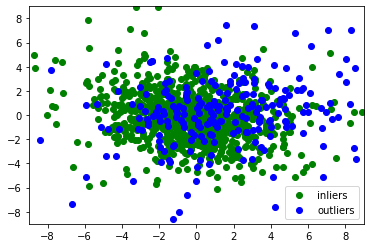

In [ ]:
plt.scatter(pca_dataset.loc[pca_dataset['Y'] == 0]['principal component 1'],
            pca_dataset.loc[pca_dataset['Y'] == 0]['principal component 2'], c='g', label='inliers') 
plt.scatter(pca_dataset.loc[pca_dataset['Y'] == 1]['principal component 1'],
            pca_dataset.loc[pca_dataset['Y'] == 1]['principal component 2'], c='b', label='outliers') 
plt.xlim(-9,9)
plt.ylim(-9,9)
plt.legend(numpoints=11)
plt.show()


## K means cluster
k-means clustering is an unsupervised method of vector quantization, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.


In [ ]:
# Separating the data from the taget
X1 = dataset[features]
y1 = dataset[target]

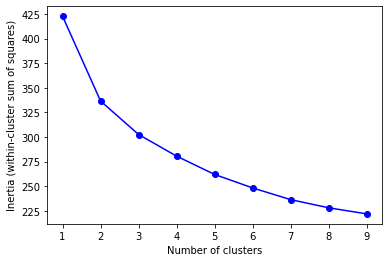

In [ ]:
# Performing elbow method
Ks = range(1, 10)
inertia = [KMeans(i).fit(X1).inertia_ for i in Ks]

fig = plt.figure()
plt.plot(Ks, inertia, '-bo')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.show()
# The marginal gain of adding one cluster dropped quite a bit from k=3

In [ ]:
# Computing K-means with k=3
k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X1)

# Printing inertia & cluster center
print("inertia for k=3 is", kmeans.inertia_)
print("cluster centers: ", kmeans.cluster_centers_)

# Taking a quick look at the result
y = kmeans.labels_
print("cluster labels: ", y)

inertia for k=3 is 302.5450810755714
cluster centers:  [[ 2.64598339e-03  3.79231884e-01 -8.15395382e-04  8.01246029e-04
  -7.32315254e-04 -3.04416870e-04  7.56011052e-04  2.52139601e-03
   1.92056691e-04 -1.97316425e-02 -2.08164251e-02 -1.23256039e-02
  -2.70797101e-03  4.47173913e-04 -1.61932367e-02 -1.71980676e-02
  -8.36956522e-03 -7.69082126e-03 -2.67004831e-02 -3.56280193e-02
  -3.84830918e-02 -6.06280193e-03 -5.30434783e-03 -8.11594203e-04
  -1.66601449e-02 -1.69618357e-02 -1.41690821e-02  1.33552310e-03
   1.63880435e-03  2.12486494e-03  1.61199722e-03  1.93122155e-03
   1.85382073e-03  1.94332769e-03  2.55851443e-03  1.32797980e-03
  -2.51828366e-04  7.14891077e-04 -1.27261476e-03  9.99681234e-05
   1.17271707e-03  2.31760422e-04]
 [-3.13278089e-03 -4.88468208e-02  2.01009967e-03  3.07144938e-03
   1.67763450e-03  3.56229524e-03 -1.03205217e-03  5.96248147e-03
  -1.62611289e-02  6.89057803e-02  7.93583815e-02  5.28083815e-02
   1.34832370e-02  7.99710983e-04  5.23121387e-02  5

In [ ]:
# Final locations of the centroid
kmeans.cluster_centers_
# The number of iterations required to converge
kmeans.n_iter_

kmeans.labels_[:1110]

array([1, 0, 0, ..., 0, 0, 0], dtype=int32)

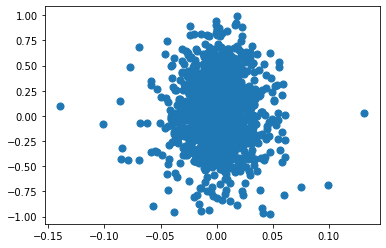

In [ ]:
X1
plt.scatter(X1.iloc[:, 0], X1.iloc[:, 1], s=50)

In [ ]:
y_kmeans = kmeans.predict(X1)

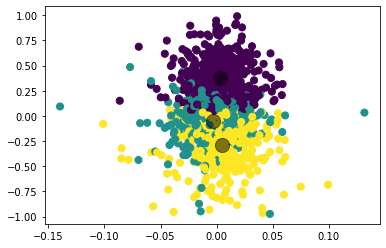

In [ ]:
plt.scatter(X1.iloc[:, 0], X1.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [ ]:
# Silhouette Analysis
range_n_clusters=[2,3,4,5,6,7,8,9,10]
for n_clusters in range_n_clusters:
    clusterer=KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels=clusterer.fit_predict(X1)
    silhouette_avg=silhouette_score(X1,cluster_labels)
    print("For n_clusters=", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters= 2 The average silhouette_score is : 0.19708403402114116
For n_clusters= 3 The average silhouette_score is : 0.15500134894680473
For n_clusters= 4 The average silhouette_score is : 0.14291430108385306
For n_clusters= 5 The average silhouette_score is : 0.1460346098615955
For n_clusters= 6 The average silhouette_score is : 0.15001144038375236
For n_clusters= 7 The average silhouette_score is : 0.12490247100506371
For n_clusters= 8 The average silhouette_score is : 0.11332831002297651
For n_clusters= 9 The average silhouette_score is : 0.10319897632545463
For n_clusters= 10 The average silhouette_score is : 0.09315691583387307


In [ ]:
# Computing K-means with k=2 (best score of silhoutte analysis)
k = 2
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X1)

# Printing inertia & cluster center
print("inertia for k=2 is", kmeans.inertia_)
print("cluster centers: ", kmeans.cluster_centers_)

# Taking a quick look at the result
y = kmeans.labels_
print("cluster labels: ", y)

inertia for k=2 is 336.499572127488
cluster centers:  [[ 1.35519436e-03  3.25166667e-01 -1.64198036e-03  3.47707769e-04
  -1.28780179e-04  1.37239329e-04  9.32138861e-05  8.63570903e-04
   5.34490876e-03 -7.67340824e-03 -8.24157303e-03 -5.19250936e-03
  -8.98127341e-04  8.50749064e-05 -6.37265918e-03 -6.59925094e-03
  -3.23970037e-03 -1.48501873e-03 -7.40262172e-03 -8.54494382e-03
  -8.21348315e-03 -1.47378277e-03 -6.31086142e-04  7.49063670e-04
  -6.57378277e-03 -6.48333333e-03 -5.20842697e-03  9.24267590e-04
   1.15912846e-03  1.26795444e-03  1.18334431e-03  1.26962758e-03
   1.25107136e-03  1.15818432e-03  1.40005092e-03  7.12758525e-04
  -7.81870138e-05  8.04012904e-04 -2.28114233e-03 -7.36725379e-06
   2.07833982e-03  6.71387772e-04]
 [ 1.93438826e-03 -2.31857639e-01  2.49595072e-03  4.03963961e-05
  -5.12367379e-05 -9.10400256e-05 -3.73538577e-04  7.37515052e-04
  -5.29876798e-03 -5.40798611e-04 -1.19965278e-03 -6.08333333e-03
  -8.55677083e-03 -9.91828125e-03 -4.23611111e-03 -3.

In [ ]:
y_kmeans = kmeans.predict(X1)

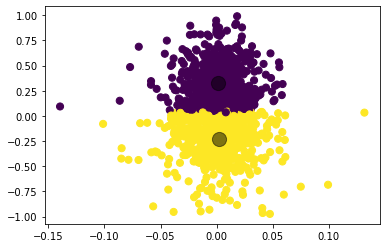

In [ ]:
plt.scatter(X1.iloc[:, 0], X1.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# **Anomaly Detection** #


## One-class Support Vector Machines
One-class SVMs detect anomalies by fitting a SVM using one single target class. The data, which is assumed to contain no anomalies (indeed SVMs are sensitive to outliers), is used for training a model. The output returns boundaries that can be used to classify future incoming data points.

In [ ]:
# Separating the data from the target
target = 'Y'
features = dataset.columns[dataset.columns!=target]

X_total =  dataset[features].values
# Not considering anomalies
dataset_no_anomaly = dataset[dataset['Y'] == 1]


X = dataset_no_anomaly[features].values

In [ ]:
for outlier_ratio in [0.2, 0.1, 0.05]:
    classifier = svm.OneClassSVM(nu=0.99 * outlier_ratio + 0.01,kernel="rbf",gamma=0.1)
    classifier.fit(X)
    y_pred = classifier.predict(X_total)
    num_errors = sum(y_pred != dataset['Y'])
    print('Outlier Ratio %.3f\tNumber of errors: %d'%(outlier_ratio,num_errors))

Outlier Ratio 0.200	Number of errors: 921
Outlier Ratio 0.100	Number of errors: 898
Outlier Ratio 0.050	Number of errors: 888


## Isolation Forest
Isolation forest detects anomalies using isolation, calculating how far a data point is to the rest of the data. Indeed it computes the number of splits required to isolate a single data points: how many times we need to perform splits on features in the dataset before we end up with a region that contains only the single target sample.

In [ ]:
# Separating the data from the target
target = 'Y'
features = dataset.columns[dataset.columns!=target]

X_total =  dataset[features].values

dataset_no_anomaly = dataset[dataset['Y'] == 1]


X = dataset_no_anomaly[features].values

In [ ]:
num_samples=1200
for outlier_ratio in [0.2, 0.1, 0.05, 0.01]:
    rng = np.random.RandomState(1234)

    classifier = IsolationForest(max_samples=num_samples, contamination=outlier_ratio, random_state=rng)
    classifier.fit(X)
    y_pred = classifier.predict(X_total)
    num_errors = sum(y_pred != dataset['Y']) 
    print('Outlier Ratio %.3f\tNumber of errors: %d'%(outlier_ratio,num_errors))

Outlier Ratio 0.200	Number of errors: 921
Outlier Ratio 0.100	Number of errors: 897
Outlier Ratio 0.050	Number of errors: 885
Outlier Ratio 0.010	Number of errors: 876


## Separation in Training and Test
We have also done a reshuffle before separating training and test

In [ ]:
# Separating the data from the target
target = 'Y'
features = dataset.columns[dataset.columns!=target]

X = dataset[features].values
y = dataset[target].values

In [ ]:
# Applying a StratifiedShuffleSplit to split the dataset into balanced training and test set
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=1234)

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [ ]:
# Building the training set from the given split
train_dataset = pd.DataFrame(data=X_train, columns=features)
# Adding the target column "Y"
train_dataset['Y'] = y_train
train_dataset

,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,USGG30YR,GT10,USGG2YR,USGG3M,US0001M,GTDEM30Y,GTDEM10Y,GTDEM2Y,EONIA,GTITL30YR,GTITL10YR,GTITL2YR,GTJPY30YR,GTJPY10YR,GTJPY2YR,GTGBP30Y,GTGBP20Y,GTGBP2Y,LUMSTRUU,LMBITR,LUACTRUU,LF98TRUU,LG30TRUU,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN,Y
0,0.018335,0.004,-0.042042,0.025849,-0.004195,0.013216,0.007064,0.055797,-0.260267,-0.2067,-0.212,-0.1607,-0.0521,0.00000,0.033,0.009,-0.050,0.250,0.056,0.029,-0.036,0.061,0.000,-0.037,0.0250,-0.0660,-0.0850,0.010614,0.004122,0.011178,0.002652,0.006308,0.000091,0.013029,0.009069,0.026936,0.024394,0.016963,0.072752,0.062045,0.013844,0.074467,0
1,0.019725,0.654,0.044329,0.002076,-0.009802,0.009735,0.005367,0.006686,-0.012725,-0.1361,-0.116,-0.0093,0.0305,-0.00150,-0.157,-0.181,-0.061,0.004,0.022,-0.084,-0.449,0.024,0.005,0.004,-0.1759,-0.1814,-0.0264,0.001318,0.001656,0.011226,0.008843,0.012176,0.010089,0.009171,0.013940,0.007408,-0.009256,0.025905,0.013218,0.038178,-0.041959,0.011327,0
2,0.013340,0.145,-0.058415,0.024460,0.005348,0.000273,-0.016040,0.015078,-0.037831,-0.0744,-0.058,0.0287,-0.0920,0.00125,-0.051,-0.051,0.014,-0.018,-0.036,-0.043,0.038,0.056,-0.017,0.019,-0.0364,-0.0651,-0.0616,0.006722,0.000418,0.002108,-0.000535,-0.000735,-0.002720,0.000457,0.001818,0.003874,0.010685,-0.006822,0.021929,-0.052588,-0.002647,0.046462,1
3,-0.008188,-0.430,-0.003759,0.014920,0.008344,0.018775,-0.006426,0.015679,-0.069017,0.0870,0.084,-0.2030,-0.6180,-0.67750,0.033,0.011,-0.011,-0.380,-0.025,-0.024,-0.022,-0.058,-0.089,-0.069,0.1266,0.0941,-0.0067,0.004394,0.011617,0.006988,0.016569,0.016268,0.020715,0.013461,0.000000,0.013461,-0.010352,-0.007688,0.073332,0.040420,0.027467,0.060989,0
4,0.023832,-0.498,-0.071754,-0.004399,-0.003614,-0.004683,0.007998,-0.010598,-0.038286,-0.1440,-0.150,-0.1041,-0.0623,-0.00400,-0.107,-0.122,-0.141,-0.040,-0.112,-0.124,-0.124,-0.009,-0.087,-0.071,-0.1350,-0.1440,-0.0770,0.005857,0.005095,0.009599,0.002521,0.001332,0.002679,0.001543,0.008927,0.013284,0.015470,-0.027432,-0.033521,-0.073257,0.027245,-0.007916,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0.043526,-0.413,0.034595,-0.002138,0.000471,-0.008845,0.001057,-0.016051,0.028103,0.0065,0.002,-0.0603,-0.0887,0.00000,-0.049,-0.041,0.031,0.000,-0.053,-0.047,0.026,0.009,-0.019,0.021,-0.0030,-0.0070,-0.0250,0.002535,0.001583,0.001669,0.004433,0.006785,0.005906,0.008920,0.000963,0.007952,0.009038,0.021351,0.032173,0.007116,0.017284,0.018544,0
884,-0.005500,0.425,0.015152,-0.014948,0.005501,-0.011979,0.000188,-0.031421,0.004480,0.1429,0.117,0.0491,-0.0101,0.00000,-0.067,-0.086,-0.036,0.029,0.059,0.034,0.242,0.029,0.016,0.007,-0.0434,-0.0541,-0.0302,-0.001957,-0.001473,-0.005792,0.000261,-0.000290,-0.001585,-0.000994,0.001459,0.000851,-0.009915,-0.024939,-0.028151,-0.005601,0.023568,0.000845,1
885,-0.002721,-0.584,0.148471,0.002605,0.004548,0.003721,0.005422,0.017193,-0.201271,0.1557,0.100,-0.0076,0.0000,0.00175,0.126,0.075,0.005,0.005,-0.150,-0.195,-0.192,-0.049,-0.039,0.011,0.1304,0.1217,0.0830,-0.001638,-0.000720,-0.006410,0.004850,0.005924,0.009591,0.006021,-0.003010,0.013273,0.034210,0.021471,0.002320,-0.006274,0.041169,0.029468,0
886,-0.034492,-0.222,-0.049364,0.000898,0.003213,0.001466,-0.004472,0.020487,0.045915,-0.0596,-0.048,-0.0110,0.0000,-0.00302,0.033,0.017,-0.020,-0.008,-0.063,-0.090,-0.127,0.068,0.017,-0.005,0.0230,0.0259,0.0049,-0.000910,-0.000394,0.001438,0.000935,0.000234,0.002929,-0.001772,-0.007892,0.010883,0.013254,0.037864,0.007922,0.012687,0.021527,0.013301,0


In [ ]:
# Building the test set from the given split
test_dataset = pd.DataFrame(data=X_test, columns=features)
# Adding the target column "Y"
test_dataset['Y'] = y_test
test_dataset

,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,USGG30YR,GT10,USGG2YR,USGG3M,US0001M,GTDEM30Y,GTDEM10Y,GTDEM2Y,EONIA,GTITL30YR,GTITL10YR,GTITL2YR,GTJPY30YR,GTJPY10YR,GTJPY2YR,GTGBP30Y,GTGBP20Y,GTGBP2Y,LUMSTRUU,LMBITR,LUACTRUU,LF98TRUU,LG30TRUU,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN,Y
0,-0.029273,-0.204,0.071637,-0.009302,0.007530,-0.000655,-0.012007,-0.035883,0.033120,-0.0293,-0.107,-0.3705,-0.1234,-0.10000,-0.152,-0.148,-0.215,0.099,-0.149,-0.151,-0.242,-0.038,0.005,0.061,-0.1210,-0.1330,-0.2780,0.003165,0.003951,0.005231,0.000574,-0.001370,-0.002739,0.001521,0.001123,-0.018211,-0.017443,0.018702,0.033742,-0.026987,0.022936,0.057340,0
1,0.040683,-0.916,-0.012837,0.009204,-0.004219,-0.004638,-0.020265,0.001282,-0.078286,-0.0827,-0.120,-0.1893,0.0811,0.00000,0.000,0.004,0.006,-0.009,-0.005,0.084,0.122,-0.205,-0.051,-0.030,-0.0103,-0.0165,-0.1022,0.003238,0.007717,0.011571,0.045770,0.033998,0.008509,0.006248,0.003543,0.030578,0.019193,0.011024,0.048791,-0.099238,0.008301,0.012733,1
2,0.023087,0.460,-0.027359,0.014446,-0.001568,0.014033,0.021564,0.054213,0.026516,0.1220,0.101,0.0110,-0.0072,0.00600,0.054,0.097,0.027,0.035,0.144,0.215,0.182,0.017,0.033,0.001,0.1391,0.1318,0.0538,-0.000961,-0.001801,-0.007270,0.009598,0.010457,0.015392,0.007401,0.007404,-0.002981,0.054909,0.023302,0.080494,0.107049,0.035777,0.045419,1
3,0.000355,0.375,-0.037538,-0.000895,0.016181,-0.002093,-0.010555,0.065424,0.030861,0.0030,0.023,0.0610,0.0010,0.06875,0.053,0.096,0.107,0.000,0.042,0.105,0.108,0.054,0.039,-0.011,0.1048,0.1106,0.1363,0.000742,-0.004723,-0.001051,0.002395,-0.002082,-0.020145,-0.002993,0.000000,-0.016920,0.011130,-0.007744,-0.040176,-0.044385,-0.016361,0.029194,1
4,0.006938,-0.462,0.069251,-0.001034,0.009375,0.005703,-0.005058,0.024851,0.012341,0.1225,0.139,0.1253,-0.0051,0.00170,-0.033,-0.013,0.009,0.107,-0.127,-0.060,-0.018,0.089,-0.001,-0.009,0.1391,0.1272,0.1912,-0.002229,-0.001374,-0.007838,0.004182,0.003440,0.006960,0.004335,-0.009063,-0.002950,0.001213,0.012198,-0.031729,0.031530,0.024758,-0.004628,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,-0.003182,0.258,-0.122023,-0.010725,-0.004483,0.007027,0.007209,0.011911,0.040111,0.0012,-0.012,-0.0552,0.0000,0.00000,0.000,0.001,-0.030,0.200,0.000,-0.001,-0.028,-0.010,0.000,-0.005,0.0000,0.0030,0.0710,0.004108,-0.000388,0.002650,-0.006002,0.000105,-0.014196,0.014059,0.014383,-0.004184,-0.013596,-0.008571,-0.002537,0.063150,-0.092623,-0.058259,0
218,0.017243,-0.154,-0.015424,0.017243,-0.010807,-0.012257,0.013106,0.026174,0.067649,-0.0604,-0.082,-0.0488,-0.0867,-0.00111,-0.086,-0.076,-0.050,0.002,-0.108,-0.125,-0.025,0.025,-0.001,-0.006,-0.0465,-0.0474,-0.0450,0.004294,0.001032,0.006103,0.001902,0.004494,0.004107,0.004264,0.011143,-0.000619,-0.001324,0.009173,0.028375,0.014624,0.011862,0.024211,0
219,-0.004069,-0.307,-0.006277,-0.008703,-0.009232,0.009289,0.011885,-0.011863,0.088049,-0.0570,-0.158,-0.1730,-0.1410,-0.02750,-0.075,-0.103,-0.159,-0.050,-0.052,-0.083,-0.138,-0.003,0.005,-0.072,-0.0459,-0.0294,0.0519,0.005204,0.008821,0.007443,0.007331,0.009676,0.014449,0.009803,0.000000,-0.052480,-0.024304,-0.047401,0.030554,-0.175411,-0.028472,-0.024346,1
220,0.001481,0.397,-0.055114,0.034240,-0.008346,-0.005151,0.011004,0.063671,-0.166947,0.0784,0.061,0.0019,-0.0203,0.00750,0.066,0.043,0.010,-0.001,-0.101,-0.138,-0.102,0.003,0.019,-0.006,0.1137,0.1171,0.0596,0.000387,0.002446,-0.000792,0.006539,0.006482,0.004923,0.000738,0.001486,0.023003,0.011253,0.041968,-0.000300,0.037807,0.026325,0.032197,0


## Trees

In [ ]:
# Separating the data from the target
target = 'Y'
features = train_dataset.columns[train_dataset.columns!=target]

# Preparing X and y for the training set
X = train_dataset[features]
y = train_dataset[target]

# Preparing X and y for the test set
X_test = test_dataset[features]
y_test = test_dataset[target]

## Decision tree

In [ ]:
# Setting up the parameters grid
grid = {"max_depth": [3, None],
        "max_features": range(1, 10),
        "min_samples_leaf": range(1, 10),
        "criterion": ["gini", "entropy"]}

# Instantiating the Decision Tree classifier
decisiontree = DecisionTreeClassifier(random_state=123)

# Instantiating the GridSearchCV
decisiontree_cv = GridSearchCV(decisiontree, grid, cv=StratifiedKFold(), scoring='f1', verbose=2, n_jobs=-1)

# Fitting it to the training set
decisiontree_cv.fit(X, y)

# Printing the tuned parameters and the best score obtained
print("Tuned Decision Tree Parameters: {}".format(decisiontree_cv.best_params_))
print("Best score is {}".format(decisiontree_cv.best_score_))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 9, 'min_samples_leaf': 5}
Best score is 0.4817225177968001


In [ ]:
# Istantiating the model using the best prameters found
decisiontree = DecisionTreeClassifier(criterion='gini',max_depth = None, max_features= 9, min_samples_leaf= 5, random_state=123)

# Fitting it to the training set
decisiontree.fit(X, y);

# Defining the scoring metrics to evaluate
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

# Evaluating the metrics using Cross-Validation on the training set
evalu = cross_validate(decisiontree, X, y, cv=StratifiedKFold(), scoring=scoring, verbose=2, n_jobs=-1)

# Computing the predictions on the training set and on the test set
yp = decisiontree.predict(X);
yp_test = decisiontree.predict(X_test);

def PrintConfusionMatrix(model, true_y, predicted_y):
    cm = confusion_matrix(true_y,predicted_y)
    print("\t"+str(model.classes_[0])+"\t"+str(model.classes_[1]))
    print(str(model.classes_[0]) + "\t",cm[0][0],"\t",cm[0][1])
    print(str(model.classes_[1]) + "\t",cm[1][0],"\t",cm[1][1])

# Printing the confusion matrix and the metrics both for the training set and for the test set
print("Confusion Matrix (Train) - DecisionTree")
PrintConfusionMatrix(decisiontree, y, yp)

print("\nAccuracy (CV)   %.3f %.3f" % (np.average(evalu['test_accuracy']), np.std(evalu['test_accuracy'])))
print("Precision (Train) %.3f %.3f" % (np.average(evalu['test_precision']), np.std(evalu['test_precision'])))
print("Recall (Train)    %.3f %.3f" % (np.average(evalu['test_recall']), np.std(evalu['test_recall'])))
print("F1 (Train)        %.3f %.3f" % (np.average(evalu['test_f1_score']), np.std(evalu['test_f1_score'])))

print("\nConfusion Matrix (Test) - DecisionTree")
PrintConfusionMatrix(decisiontree, y_test, yp_test)

print("\nAccuracy (Test) %.3f" % accuracy_score(y_test, yp_test))
print("Precision (Test)  %.3f" % precision_score(y_test, yp_test))
print("Recall (Test)     %.3f" % recall_score(y_test, yp_test))
print("F1 (Test)         %.3f" % f1_score(y_test, yp_test))

Confusion Matrix (Train) - DecisionTree
	0	1
0	 661 	 37
1	 50 	 140

Accuracy (CV)   0.779 0.021
Precision (Train) 0.485 0.048
Recall (Train)    0.484 0.086
F1 (Train)        0.482 0.056

Confusion Matrix (Test) - DecisionTree
	0	1
0	 154 	 21
1	 23 	 24

Accuracy (Test) 0.802
Precision (Test)  0.533
Recall (Test)     0.511
F1 (Test)         0.522


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


## Bagging tree

In [ ]:
# Setting up the parameters grid
grid = {'bootstrap': [True, False],
        'bootstrap_features': [True, False],    
        'n_estimators': [15, 50],
        'max_samples' : [0.6, 0.8, 1.0]}

# Instantiating the Bagging classifier
bagging = BaggingClassifier(DecisionTreeClassifier(criterion='entropy', random_state=123), random_state=123)

# Instantiating the GridSearchCV
bagging_cv = GridSearchCV(bagging, grid, cv=StratifiedKFold(), scoring='f1', verbose=2, n_jobs=-1) 

# Fitting it to the training set
bagging_cv.fit(X,y)

# Printing the tuned parameters and the best score obtained
print("Tuned Bagging (Tree Parameters: {}".format(bagging_cv.best_params_))
print("Best score is {}".format(bagging_cv.best_score_))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Tuned Bagging (Tree Parameters: {'bootstrap': False, 'bootstrap_features': False, 'max_samples': 0.8, 'n_estimators': 50}
Best score is 0.5046073308638162


In [ ]:
# Istantiating the model using the best prameters found
bagging = BaggingClassifier(DecisionTreeClassifier(criterion='entropy', random_state=123),
                            bootstrap = False, bootstrap_features= False, max_samples= 0.8, n_estimators = 50, random_state=123)

# Fitting it to the training set
bagging.fit(X, y);

# Defining the scoring metrics to evaluate
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

# Evaluating the metrics using Cross-Validation on the training set
evalu = cross_validate(bagging, X, y, cv=StratifiedKFold(5, shuffle=True, random_state=123), scoring=scoring, verbose=2, n_jobs=-1)

# Computing the predictions on the training set and on the test set
yp = bagging.predict(X);
yp_test = bagging.predict(X_test);

def PrintConfusionMatrix(model, true_y, predicted_y):
    cm = confusion_matrix(true_y,predicted_y)
    print("\t"+str(model.classes_[0])+"\t"+str(model.classes_[1]))
    print(str(model.classes_[0]) + "\t",cm[0][0],"\t",cm[0][1])
    print(str(model.classes_[1]) + "\t",cm[1][0],"\t",cm[1][1])

# Printing the confusion matrix and the metrics both for the training set and for the test set
print("Confusion Matrix (Train) - Bagging")
PrintConfusionMatrix(bagging, y, yp)

print("\nAccuracy (CV)   %.3f %.3f" % (np.average(evalu['test_accuracy']), np.std(evalu['test_accuracy'])))
print("Precision (Train) %.3f %.3f" % (np.average(evalu['test_precision']), np.std(evalu['test_precision'])))
print("Recall (Train)    %.3f %.3f" % (np.average(evalu['test_recall']), np.std(evalu['test_recall'])))
print("F1 (Train)        %.3f %.3f" % (np.average(evalu['test_f1_score']), np.std(evalu['test_f1_score'])))

print("\nConfusion Matrix (Test) - Bagging")
PrintConfusionMatrix(bagging, y_test, yp_test)

print("\nAccuracy (Test) %.3f" % accuracy_score(y_test, yp_test))
print("Precision (Test)  %.3f" % precision_score(y_test, yp_test))
print("Recall (Test)     %.3f" % recall_score(y_test, yp_test))
print("F1 (Test)         %.3f" % f1_score(y_test, yp_test))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Confusion Matrix (Train) - Bagging
	0	1
0	 698 	 0
1	 0 	 190

Accuracy (CV)   0.809 0.020
Precision (Train) 0.601 0.092
Recall (Train)    0.363 0.056
F1 (Train)        0.447 0.043

Confusion Matrix (Test) - Bagging
	0	1
0	 160 	 15
1	 19 	 28

Accuracy (Test) 0.847
Precision (Test)  0.651
Recall (Test)     0.596
F1 (Test)         0.622


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.7s finished


## AdaBoost Tree

In [ ]:
# Setting up the parameters grid
grid = {'n_estimators': [15, 50],
        'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0]}

# Instantiating the AdaBoost classifier
adaboost = AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy', random_state=123), random_state=123)

# Instantiating the GridSearchCV
adaboost_cv = GridSearchCV(adaboost, grid, cv=StratifiedKFold(), scoring='f1', verbose=2, n_jobs=-1)

# Fitting it to the training set
adaboost_cv.fit(X,y)

# Printing the tuned parameters and the best score obtained
print("Tuned AdaBoost (Tree) Parameters: {}".format(adaboost_cv.best_params_))
print("Best score is {}".format(adaboost_cv.best_score_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Tuned AdaBoost (Tree) Parameters: {'learning_rate': 0.0001, 'n_estimators': 15}
Best score is 0.3958728640554535


In [ ]:
# Istantiating the model using the best prameters found
adaboost = AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy', random_state=123),
                              learning_rate = 0.0001, n_estimators= 15, random_state=123)

# Fitting it to the training set
adaboost.fit(X, y);

# Defining the scoring metrics to evaluate
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

# Evaluating the metrics using Cross-Validation on the training set
evalu = cross_validate(adaboost, X, y, cv=StratifiedKFold(5, shuffle=True, random_state=123), scoring=scoring, verbose=2, n_jobs=-1)

# Computing the predictions on the training set and on the test set
yp = adaboost.predict(X);
yp_test = adaboost.predict(X_test);

def PrintConfusionMatrix(model, true_y, predicted_y):
    cm = confusion_matrix(true_y,predicted_y)
    print("\t"+str(model.classes_[0])+"\t"+str(model.classes_[1]))
    print(str(model.classes_[0]) + "\t",cm[0][0],"\t",cm[0][1])
    print(str(model.classes_[1]) + "\t",cm[1][0],"\t",cm[1][1])

# Printing the confusion matrix and the metrics both for the training set and for the test set    
print("Confusion Matrix (Train) - AdaBoost (Tree)")
PrintConfusionMatrix(adaboost, y, yp)

print("\nAccuracy (CV)   %.3f %.3f" % (np.average(evalu['test_accuracy']), np.std(evalu['test_accuracy'])))
print("Precision (Train) %.3f %.3f" % (np.average(evalu['test_precision']), np.std(evalu['test_precision'])))
print("Recall (Train)    %.3f %.3f" % (np.average(evalu['test_recall']), np.std(evalu['test_recall'])))
print("F1 (Train)        %.3f %.3f" % (np.average(evalu['test_f1_score']), np.std(evalu['test_f1_score'])))

print("\nConfusion Matrix (Test) - AdaBoost (Tree)")
PrintConfusionMatrix(adaboost, y_test, yp_test)

print("\nAccuracy (Test) %.3f" % accuracy_score(y_test, yp_test))
print("Precision (Test)  %.3f" % precision_score(y_test, yp_test))
print("Recall (Test)     %.3f" % recall_score(y_test, yp_test))
print("F1 (Test)         %.3f" % f1_score(y_test, yp_test))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Confusion Matrix (Train) - AdaBoost (Tree)
	0	1
0	 698 	 0
1	 0 	 190

Accuracy (CV)   0.753 0.035
Precision (Train) 0.415 0.089
Recall (Train)    0.379 0.087
F1 (Train)        0.396 0.088

Confusion Matrix (Test) - AdaBoost (Tree)
	0	1
0	 157 	 18
1	 19 	 28

Accuracy (Test) 0.833
Precision (Test)  0.609
Recall (Test)     0.596
F1 (Test)         0.602


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


## Random Forest

In [ ]:
# Setting up the parameters grid
grid = {'n_estimators': [int(x) for x in np.linspace(start=10, stop=50, num=20)],
        'max_depth': [3, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]}

# Instantiating the Random Forest classifier
randomforest = RandomForestClassifier()

# Instantiating the GridSearchCV
randomforest_cv = GridSearchCV(randomforest, grid, cv=StratifiedKFold(random_state=None), scoring='f1', verbose=2, n_jobs=-1)

# Fitting it to the training set
randomforest_cv.fit(X,y)

# Printing the tuned parameters and the best score obtained
print("Tuned Random Forest Parameters: {}".format(randomforest_cv.best_params_))
print("Best score is {}".format(randomforest_cv.best_score_))

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
Tuned Random Forest Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best score is 0.5065979963705048


In [ ]:
# Istantiating the model using the best prameters found
randomforest = RandomForestClassifier(bootstrap= False, max_depth= None, min_samples_leaf= 1, min_samples_split= 5, n_estimators= 50)

# Fitting it to the training set
randomforest.fit(X, y);

# Defining the scoring metrics to evaluate
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

# Evaluating the metrics using Cross-Validation on the training set
evalu = cross_validate(randomforest, X, y, cv=StratifiedKFold( shuffle=True, random_state=123), scoring=scoring, verbose=2, n_jobs=-1)

# Computing the predictions on the training set and on the test set
yp = randomforest.predict(X);
yp_test = randomforest.predict(X_test);

def PrintConfusionMatrix(model, true_y, predicted_y):
    cm = confusion_matrix(true_y,predicted_y)
    print("\t"+str(model.classes_[0])+"\t"+str(model.classes_[1]))
    print(str(model.classes_[0]) + "\t",cm[0][0],"\t",cm[0][1])
    print(str(model.classes_[1]) + "\t",cm[1][0],"\t",cm[1][1])

# Printing the confusion matrix and the metrics both for the training set and for the test set    
print("Confusion Matrix (Train) - Random Forest")
PrintConfusionMatrix(randomforest, y, yp)

print("\nAccuracy (CV)   %.3f %.3f" % (np.average(evalu['test_accuracy']), np.std(evalu['test_accuracy'])))
print("Precision (Train) %.3f %.3f" % (np.average(evalu['test_precision']), np.std(evalu['test_precision'])))
print("Recall (Train)    %.3f %.3f" % (np.average(evalu['test_recall']), np.std(evalu['test_recall'])))
print("F1 (Train)        %.3f %.3f" % (np.average(evalu['test_f1_score']), np.std(evalu['test_f1_score'])))

print("\nConfusion Matrix (Test) - Random Forest")
PrintConfusionMatrix(randomforest, y_test, yp_test)

print("\nAccuracy (Test) %.3f" % accuracy_score(y_test, yp_test))
print("Precision (Test)  %.3f" % precision_score(y_test, yp_test))
print("Recall (Test)     %.3f" % recall_score(y_test, yp_test))
print("F1 (Test)         %.3f" % f1_score(y_test, yp_test))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Confusion Matrix (Train) - Random Forest
	0	1
0	 698 	 0
1	 0 	 190

Accuracy (CV)   0.806 0.011
Precision (Train) 0.592 0.065
Recall (Train)    0.337 0.092
F1 (Train)        0.420 0.069

Confusion Matrix (Test) - Random Forest
	0	1
0	 164 	 11
1	 22 	 25

Accuracy (Test) 0.851
Precision (Test)  0.694
Recall (Test)     0.532
F1 (Test)         0.602


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.8s finished


Features importance of the decision tree model fitted above

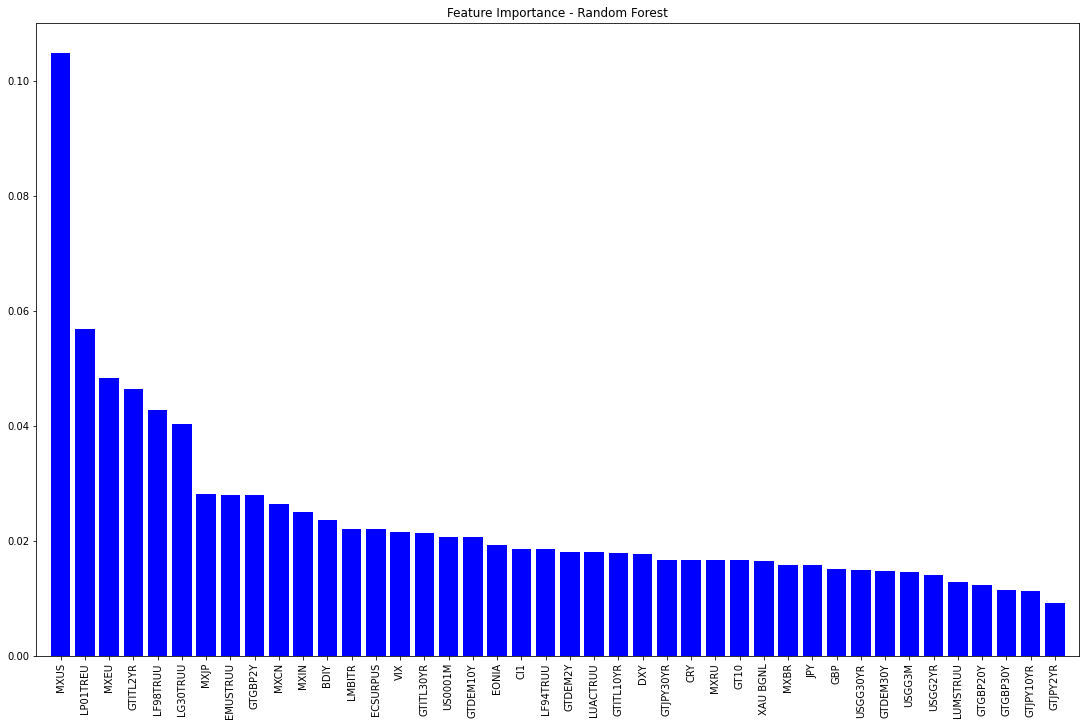

In [ ]:
# Separating the data from the target
target = 'Y'
features = train_dataset.columns[train_dataset.columns!=target]
X_f = train_dataset[features]


# Computing the importance values for the features
importances = randomforest.feature_importances_
    
# Saving the indices of the features
indices = np.argsort(importances)[::-1]

# Plotting the feature importance
plt.figure(figsize=(15, 10))
font = {'family': 'sans', 'size': 12}
    
plt.title("Feature Importance - Random Forest")
plt.xticks(range(X.shape[1]), X_f.columns[indices], rotation='vertical')
plt.xlim([-1, X_f.shape[1]])
plt.bar(range(X_f.shape[1]), importances[indices], color="b") 
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

# Neural networks

We wanted also to try neural networks and see how these preformed on the problem. Since we are also technically dealing with time series we were also interested in trying out a LSTM-network on a version of the problem an see the results.

## Creating the dataset

In [ ]:
#Separating the data from the target
target = 'Y'
features = dataset.columns[dataset.columns!=target]

x = dataset[features]
y = dataset[target]

# Create a standardized version
# Standardize all varaibles
x_standardized = (x - x.mean())/x.std()

In [ ]:
dataset_standardized = x_standardized.copy() #create copy
dataset_standardized.insert(0,'Y',y, True) #run only once

## Create train and test sets

In [ ]:
# with standardized
x_train,x_test,y_train,y_test = train_test_split(x_standardized,y,test_size=0.2)

## First approach, normal network, standrardized dataset

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(3, input_dim=np.shape(x_train)[1], activation='relu'),
  tf.keras.layers.Dense(1,activation='sigmoid')
])

loss_fn = tf.keras.losses.BinaryCrossentropy(
    from_logits=False,
    label_smoothing=0.0,
    reduction="auto",
    name="binary_crossentropy",
) # Since we are using the network for classification (binary classification) we use the loss function BinaryCrossentropy

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=20, verbose=1),
]

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy',
              'binary_crossentropy',
              tf.keras.metrics.Precision(),
              tf.keras.metrics.Recall(),
              ])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 3)                 129       
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________


In [ ]:
epochs = 100
batch_size = 32

history = model.fit(x_train, y_train, 
    epochs=epochs, 
    batch_size = batch_size,
    validation_split=0.2,
    callbacks = callbacks,
    verbose=1)

Epoch 1/100
23/23 [==============================] - 1s 31ms/step - loss: 0.6874 - accuracy: 0.5930 - binary_crossentropy: 0.6874 - precision_1: 0.1475 - recall_1: 0.1688 - val_loss: 0.6821 - val_accuracy: 0.6236 - val_binary_crossentropy: 0.6821 - val_precision_1: 0.1591 - val_recall_1: 0.1892 - lr: 0.0010
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6687 - accuracy: 0.6676 - binary_crossentropy: 0.6687 - precision_1: 0.1667 - recall_1: 0.1187 - val_loss: 0.6657 - val_accuracy: 0.6798 - val_binary_crossentropy: 0.6657 - val_precision_1: 0.1875 - val_recall_1: 0.1622 - lr: 0.0010
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6536 - accuracy: 0.7239 - binary_crossentropy: 0.6536 - precision_1: 0.2097 - recall_1: 0.0812 - val_loss: 0.6486 - val_accuracy: 0.7360 - val_binary_crossentropy: 0.6486 - val_precision_1: 0.2222 - val_recall_1: 0.1081 - lr: 0.0010
Epoch 4/100
23/23 [==============================] - 0s 4ms/step - loss: 0.

In [ ]:
evaluation1 = model.evaluate(x_test,  y_test, verbose=2,) 
F = 2*(evaluation1[3]*evaluation1[4])/(evaluation1[3]+evaluation1[4])
print("This is the F score on the test set:", F)
# F history based on validation recall and validation precision
F_history = 2*(np.array(history.history[list(history.history.keys())[-3]])*np.array(history.history[list(history.history.keys())[-2]]))/(np.array(history.history[list(history.history.keys())[-3]])+np.array(history.history[list(history.history.keys())[-2]]))

7/7 - 0s - loss: 0.4342 - accuracy: 0.8514 - binary_crossentropy: 0.4342 - precision_1: 0.7692 - recall_1: 0.2500 - 21ms/epoch - 3ms/step
This is the F score on the test set: 0.3773584922211329


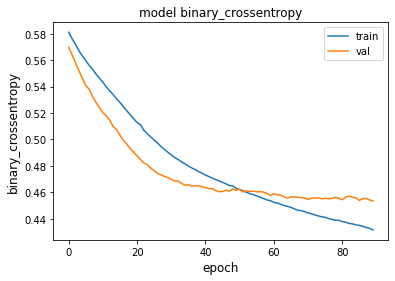

In [ ]:
metric = "binary_crossentropy"
plt.figure()
plt.plot(history.history[metric][10:])
plt.plot(history.history["val_" + metric][10:])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

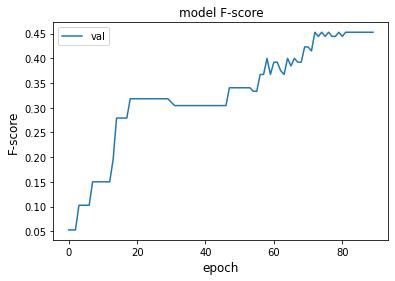

In [ ]:
metric = 'F-score'
plt.figure()
plt.plot(F_history[10:])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["val"], loc="best")
plt.show()
plt.close()

## Second approach, LSTM and normal network, sequenced data

In [ ]:
TIME_STEPS = 5 # Number of weeks
# Generated training sequences for use in the model.
def create_sequences(values, time_steps=TIME_STEPS):
    output = []
    x2 = []
    y2 = []
    for i in range(len(values) - time_steps + 1):
        output.append(values[i : (i + time_steps)])
        x2.append(values[i : (i + time_steps),1:]) #skip y
        ones_and_zeros = (values[i: (i + time_steps),0]) # only y´s for the number of time_steps
        #print(sum(ones_and_zeros))
        if sum(ones_and_zeros) >= 3: # Here we create the new label
            y2.append(1)
        else: 
            y2.append(0)
    return np.stack(x2),np.stack(y2)
x2,y2 = create_sequences(dataset_standardized.values)
x_train2,x_test2,y_train2,y_test2 = train_test_split(x2,y2, test_size=0.2)
print("Training input shape: ", x_train2.shape)

Training input shape:  (884, 5, 42)


## Normal network


In [ ]:
num_features = np.shape(x_train2)[2]

model2 = tf.keras.models.Sequential()
model2.add(Dense(4, input_shape=(TIME_STEPS, num_features)))
model2.add(Flatten())
model2.add(Dense(1, activation='sigmoid'))

model2_callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, verbose=1),
]

opt = keras.optimizers.Adam()
model2.compile(optimizer=opt,
              loss = "binary_crossentropy",
              metrics=['accuracy',
              tf.keras.metrics.Precision(),
              tf.keras.metrics.Recall(),])

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 5, 4)              172       
                                                                 
 flatten (Flatten)           (None, 20)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history2 = model2.fit(x_train2, y_train2, epochs=500, batch_size=32,
              callbacks=model2_callbacks,
              validation_split=0.2)

Epoch 1/500
23/23 [==============================] - 2s 32ms/step - loss: 0.9481 - accuracy: 0.5488 - precision_2: 0.2219 - recall_2: 0.5035 - val_loss: 0.8447 - val_accuracy: 0.5932 - val_precision_2: 0.2805 - val_recall_2: 0.6389 - lr: 0.0010
Epoch 2/500
23/23 [==============================] - 0s 4ms/step - loss: 0.8327 - accuracy: 0.5813 - precision_2: 0.2508 - recall_2: 0.5532 - val_loss: 0.7533 - val_accuracy: 0.6271 - val_precision_2: 0.2973 - val_recall_2: 0.6111 - lr: 0.0010
Epoch 3/500
23/23 [==============================] - 0s 4ms/step - loss: 0.7543 - accuracy: 0.6280 - precision_2: 0.2837 - recall_2: 0.5674 - val_loss: 0.6785 - val_accuracy: 0.6836 - val_precision_2: 0.3438 - val_recall_2: 0.6111 - lr: 0.0010
Epoch 4/500
23/23 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.6648 - precision_2: 0.3110 - recall_2: 0.5603 - val_loss: 0.6254 - val_accuracy: 0.7119 - val_precision_2: 0.3770 - val_recall_2: 0.6389 - lr: 0.0010
Epoch 5/500
23/23 [====

In [ ]:
evaluation2 = model2.evaluate(x_test2,  y_test2, verbose=2) 
F_history2 = 2*(np.array(history2.history[list(history2.history.keys())[-3]])*np.array(history2.history[list(history2.history.keys())[-2]]))/(np.array(history2.history[list(history2.history.keys())[-3]])+np.array(history2.history[list(history2.history.keys())[-2]]))
F = 2*(evaluation2[2]*evaluation2[3])/(evaluation2[2]+evaluation2[3])
print(F)

7/7 - 0s - loss: 0.3300 - accuracy: 0.8604 - precision_2: 0.7143 - recall_2: 0.3750 - 21ms/epoch - 3ms/step
0.49180328272517343


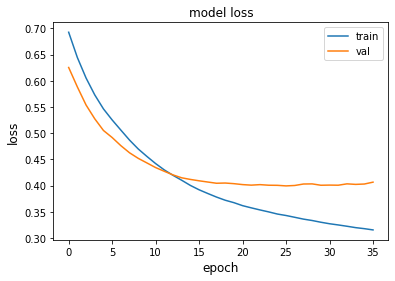

In [ ]:
metric = "loss"
plt.figure()
plt.plot(history2.history[metric][3:])
plt.plot(history2.history["val_" + metric][3:])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

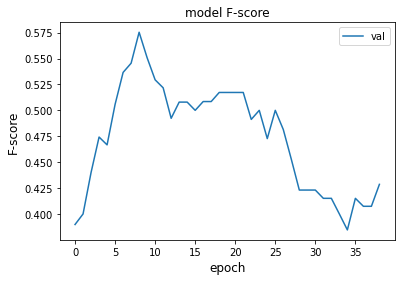

In [ ]:
metric = 'F-score'
plt.figure()
plt.plot(F_history2)
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["val"], loc="best")
plt.show()
plt.close()

Text(91.68, 0.5, 'Actual label')

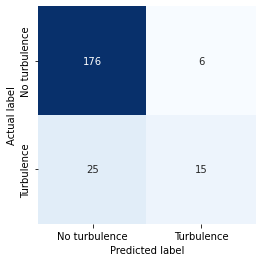

In [ ]:
y_predicted = model2.predict(x_test2) > 0.5
mat = confusion_matrix(y_test2, y_predicted)
labels = ['No turbulence', 'Turbulence']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

## LSTM model

In [ ]:
num_features = np.shape(x_train2)[2]

LSTM_model = tf.keras.models.Sequential()
LSTM_model.add(LSTM(4, input_shape=(TIME_STEPS, num_features)))
#LSTM_model.add(Flatten())
LSTM_model.add(Dense(1, activation='sigmoid'))

LSTM_callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, verbose=1),
]

opt = keras.optimizers.Adam()
LSTM_model.compile(optimizer=opt,
              loss = "binary_crossentropy",
              metrics=['accuracy',
              tf.keras.metrics.Precision(),
              tf.keras.metrics.Recall(),])

LSTM_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 4)                 752       
                                                                 
 dense_11 (Dense)            (None, 1)                 5         
                                                                 
Total params: 757
Trainable params: 757
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history3 = LSTM_model.fit(x_train2, y_train2, epochs=500, batch_size=16,
              callbacks=LSTM_callbacks,
              validation_split=0.2)

Epoch 1/500
45/45 [==============================] - 3s 25ms/step - loss: 0.6918 - accuracy: 0.5573 - precision_8: 0.1387 - recall_8: 0.2340 - val_loss: 0.6649 - val_accuracy: 0.6667 - val_precision_8: 0.2051 - val_recall_8: 0.2222 - lr: 0.0010
Epoch 2/500
45/45 [==============================] - 0s 4ms/step - loss: 0.6416 - accuracy: 0.7298 - precision_8: 0.1951 - recall_8: 0.1135 - val_loss: 0.6214 - val_accuracy: 0.7910 - val_precision_8: 0.4000 - val_recall_8: 0.0556 - lr: 0.0010
Epoch 3/500
45/45 [==============================] - 0s 4ms/step - loss: 0.5945 - accuracy: 0.8076 - precision_8: 0.6316 - recall_8: 0.0851 - val_loss: 0.5754 - val_accuracy: 0.8136 - val_precision_8: 1.0000 - val_recall_8: 0.0833 - lr: 0.0010
Epoch 4/500
45/45 [==============================] - 0s 5ms/step - loss: 0.5438 - accuracy: 0.8218 - precision_8: 0.8947 - recall_8: 0.1206 - val_loss: 0.5271 - val_accuracy: 0.8192 - val_precision_8: 1.0000 - val_recall_8: 0.1111 - lr: 0.0010
Epoch 5/500
45/45 [====

In [ ]:
evaluation3 = LSTM_model.evaluate(x_test2,  y_test2, verbose=2) 
F_history3 = 2*(np.array(history3.history[list(history3.history.keys())[-3]])*np.array(history3.history[list(history3.history.keys())[-2]]))/(np.array(history3.history[list(history3.history.keys())[-3]])+np.array(history3.history[list(history3.history.keys())[-2]]))
F = 2*(evaluation3[2]*evaluation3[3])/(evaluation3[2]+evaluation3[3])
print(F)

7/7 - 0s - loss: 0.1681 - accuracy: 0.9324 - precision_8: 0.8205 - recall_8: 0.8000 - 24ms/epoch - 3ms/step
0.8101265936053691


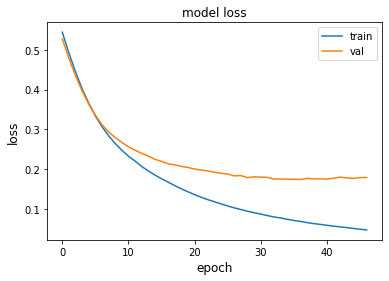

In [ ]:
metric = "loss"
plt.figure()
plt.plot(history3.history[metric][3:])
plt.plot(history3.history["val_" + metric][3:])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

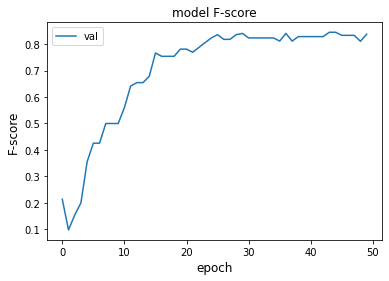

In [ ]:
metric = 'F-score'
plt.figure()
plt.plot(F_history3)
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["val"], loc="best")
plt.show()
plt.close()

Text(91.68, 0.5, 'Actual label')

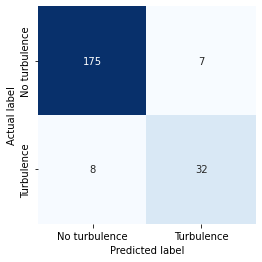

In [ ]:
y_predicted = LSTM_model.predict(x_test2) > 0.5
mat = confusion_matrix(y_test2, y_predicted)
labels = ['No turbulence', 'Turbulence']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')